# Deconstruct - Ratio

In [172]:
# Import libs
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter


In [173]:
# Read the data function
def read_data(filename):
    data = []
    with open(filename) as file: 
        for line in file.readlines(): 
            if not line.startswith("#"): 
                ls = line.split()
                data.append([ls[0], ls[1], ls[2], ls[3:]])
    return data

In [174]:
# Read all data - takes some time to run 
d = [1,2,3,4,5]
data = []
for x in d: 
    print(x)
    data.extend(read_data("../results/deconstruct/stats/chr"+ str(x)+"_Chr"+str(x)+".stats"))

1
2
3
4
5


In [175]:
# Only take the SVs
# Definition of a SV is "having a allele which is bigger than 15 bp"
svs = []
for v in data: 
    lengths = [int(x) for x in v[2].split(",")]
    if max(lengths) >= 15: 
        svs.append(v)

In [176]:
# Just check an example
svs[:2]

[['>608>756',
  '>608>609>614>615>617>618>620>621>623>624>626>627>628>630>631>634>635>637>638>643>644>645>647>648>649>651>653>654>656>657>659>662>663>664>666>668>670>671>673>675>676>678>679>681>682>684>686>688>689>747>748>750>751>752>753>755>756,>608>609>614>615>616>618>620>621>622>624>625>627>628>630>631>634>635>637>638>643>644>645>647>648>649>651>653>654>656>658>659>661>663>664>666>668>670>671>673>675>676>678>679>681>682>683>684>685>686>688>689>690>692>693>694>697>700>703>704>705>706>709>713>714>716>717>719>720>722>723>725>726>727>729>730>731>732>734>736>737>738>739>741>742>744>745>746>747>748>750>751>752>753>755>756,>608>609>614>615>617>618>620>621>623>624>626>627>628>630>631>634>635>637>638>643>644>645>646>648>649>651>653>654>656>658>659>662>663>664>666>668>670>671>673>675>676>678>679>680>682>683>684>685>686>688>689>690>691>693>694>697>700>703>704>705>706>709>712>729>730>731>732>733>734>736>737>738>739>741>742>744>745>746>747>748>750>751>752>753>755>756,>608>609>613>615>617>618>620

In [177]:
ratio = []
for x in svs:
    p = [int(y) for y in x[2].split(",")]
    ratio.append(min(p)/max(p))

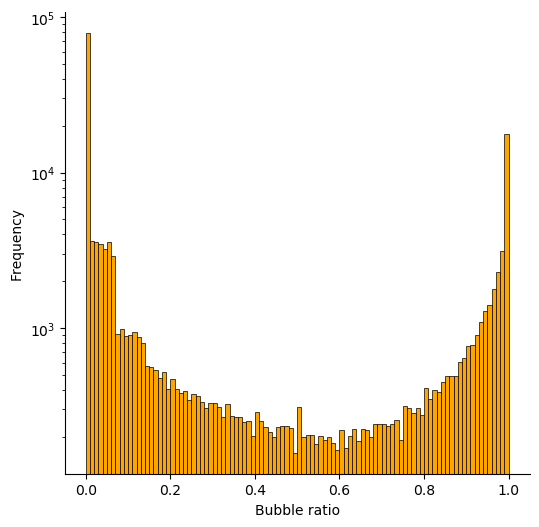

In [178]:
plt.figure(figsize = (6,6))
plt.hist(ratio, bins = 100, log = True, edgecolor = "black", linewidth=0.5, color = "orange")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Bubble ratio")
plt.ylabel("Frequency")
plt.savefig("plots/test.15open.png")
plt.savefig("plots/test.15open.pdf")
plt.show()


In [179]:
with open("tables_lists/ratio15open.txt", "w") as file:
    for item in ratio:
        file.write(str(item) + "\n")  # Write each item to the file, separated by a newline character

In [180]:
ratio50 = []
for x in svs:
    p = [int(y) for y in x[2].split(",")]
    if max(p) > 50: 
        ratio50.append(min(p)/max(p))

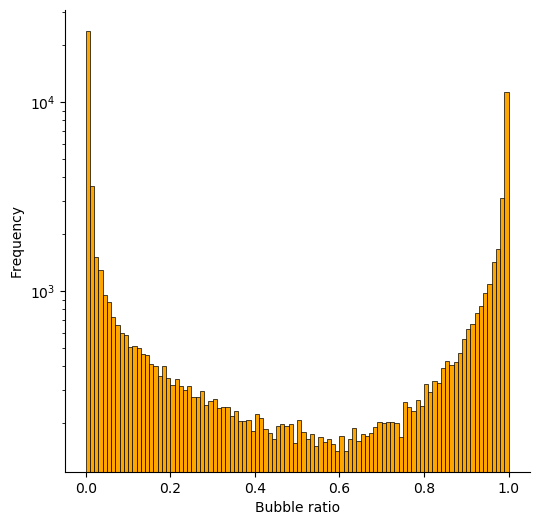

In [181]:
plt.figure(figsize = (6,6))
plt.hist(ratio50, bins = 100, log = True, edgecolor = "black", linewidth=0.5, color = "orange")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Bubble ratio")
plt.ylabel("Frequency")
plt.savefig("plots/test.50open.png")
plt.savefig("plots/test.50open.pdf")
plt.show()


In [182]:
with open("tables_lists/ratio50open.txt", "w") as file:
    for item in ratio50:
        file.write(str(item) + "\n")  # 

In [183]:
ratio_del = []
for x in svs:
    p = [int(y) for y in x[2].split(",")]
    rat = min(p)/max(p)
    if rat != 0 and rat < 0.1: 
        ratio_del.append([min(p), max(p), min(p)/max(p)])

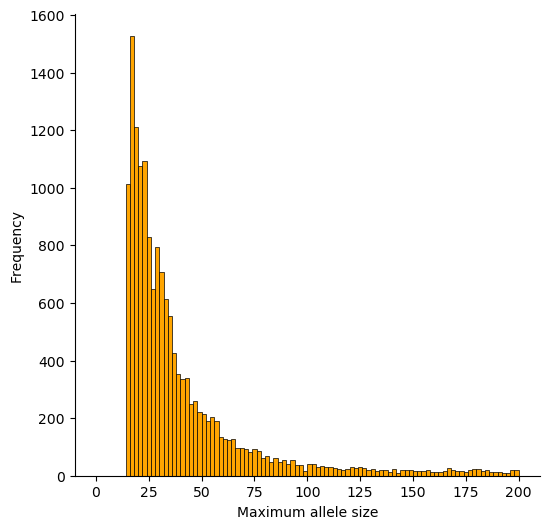

In [184]:
plt.figure(figsize = (6,6))
plt.hist([x[1] for x in ratio_del], bins = np.linspace(0,200, 101), edgecolor = "black", linewidth=0.5, color = "orange")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Maximum allele size")
plt.ylabel("Frequency")
plt.savefig("plots/test.del.png")
plt.savefig("plots/test.del.pdf")
plt.show()


In [185]:
with open("tables_lists/ratiodel.txt", "w") as file:
    for item in ratio_del:
        file.write(str(item) + "\n")  # 